## Time Series Machine Learning Regression Framework 

* Ref
1. https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a

The steps we have to consider is shifting the data backward in the time(sequence), called lag times or lags


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/Sales_Transactions_Dataset_Weekly.csv')
df_train = df_train.filter(regex=r'Product|W')
df_train.head(5)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


In [3]:
df = df_train.melt(id_vars='Product_Code', var_name='Week', value_name='Sales')

df['Product_Code'] = df['Product_Code'].str.extract('(\d+)', expand=False).astype(int)
df['Week'] = df['Week'].str.extract('(\d+)', expand=False).astype(int)

df = df.sort_values(['Week', 'Product_Code'])
df.head(10)

,Product_Code,Week,Sales
0,1,0,11
1,2,0,7
2,3,0,7
3,4,0,12
4,5,0,8
5,6,0,3
6,7,0,4
7,8,0,8
8,9,0,14
9,10,0,22


In [4]:
df.tail(10)

,Product_Code,Week,Sales
42162,810,51,1
42163,811,51,5
42164,812,51,4
42165,813,51,4
42166,814,51,11
42167,815,51,0
42168,816,51,5
42169,817,51,3
42170,818,51,0
42171,819,51,1


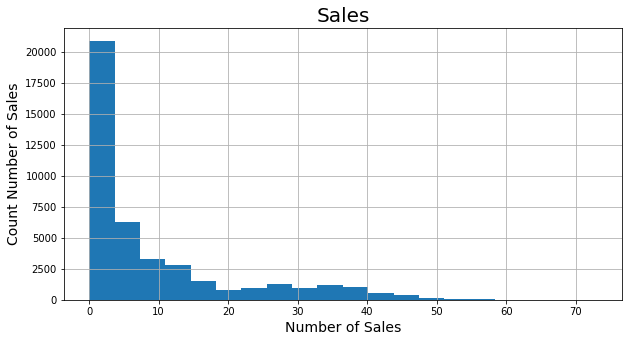

In [5]:
df['Sales'].hist(bins=20, figsize=(10,5))
plt.xlabel('Number of Sales',fontsize=14)
plt.ylabel('Count Number of Sales',fontsize=14)
plt.title('Sales',fontsize=20)
plt.show()

In [10]:
df_train = df_train.drop('Product_Code',axis = 1)

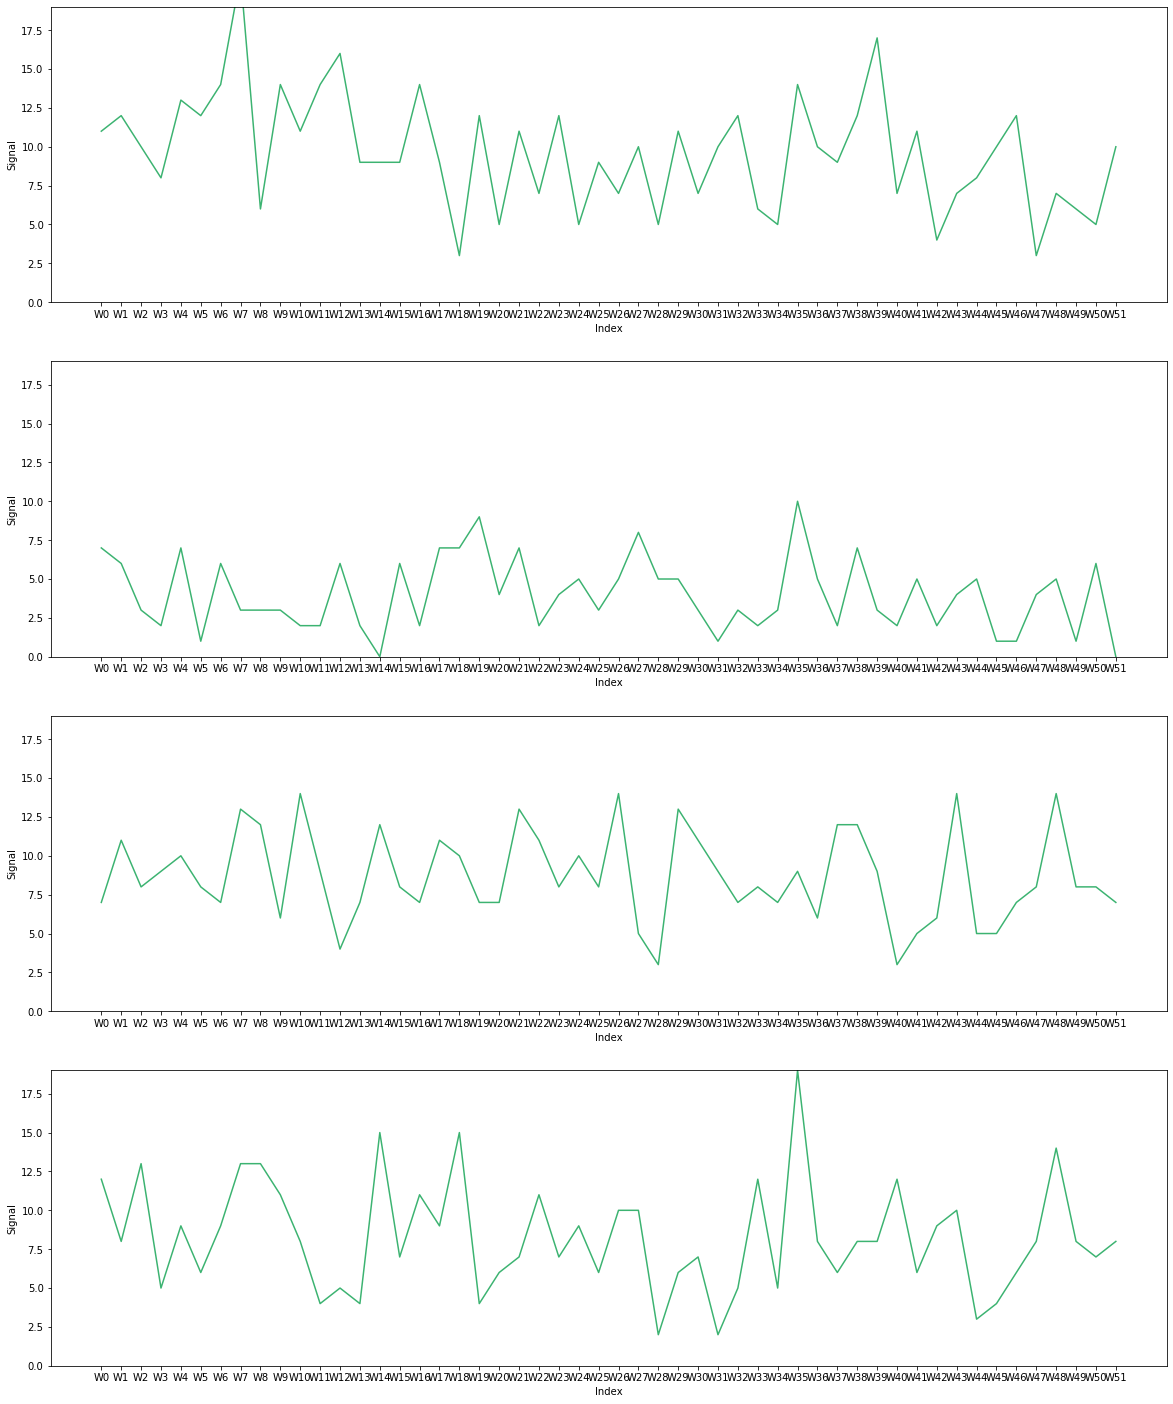

In [14]:
fig, ax = plt.subplots(4,1,figsize = (20,25))

for n in range(4):
    ax[n].plot(df_train.iloc[n,:], c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([0, 19])
    #ax[n].set_title("Test {}".format(test_files[n]));

In [15]:
df_train.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000
